## Prepare a prediction model for profit of 50_startups data.
### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
stdt = pd.read_csv('50_Startups.csv')
stdt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
stdt1 = stdt.rename(columns={'R&D Spend': 'RD', 'Administration': 'ADM', 'Marketing Spend': 'MS'})

In [29]:
stdt1.info

<bound method DataFrame.info of            RD        ADM         MS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84

In [30]:
stdt1.corr()

,RD,ADM,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


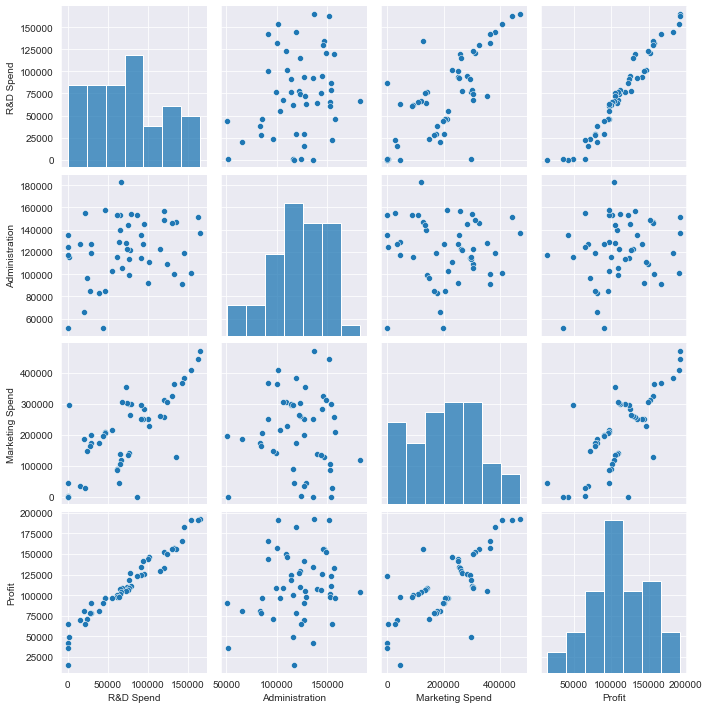

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(stdt)

## Preparing a model

In [32]:
model = smf.ols('Profit~RD+ADM+MS', data = stdt1).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        17:29:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model.params

Intercept    50122.192990
RD               0.805715
ADM             -0.026816
MS               0.027228
dtype: float64

In [36]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
ADM          -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
ADM          6.017551e-01
MS           1.047168e-01
dtype: float64


In [37]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

#### A high r squared and rsquared adj can indicate a good model. however it requires further assessment

In [48]:
# Calculating VIF

rsq_rd = smf.ols('RD~ADM+MS', data =stdt1).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_adm = smf.ols('ADM~RD+MS', data =stdt1).fit().rsquared
vif_adm = 1/(1-rsq_adm)

rsq_ms = smf.ols('MS~ADM+RD', data =stdt1).fit().rsquared
vif_ms = 1/(1-rsq_ms)

In [49]:
print(vif_rd, '\n', vif_adm, '\n', vif_ms)


2.4689030699947017 
 1.1750910070550453 
 2.3267732905308773


In [50]:
d1 = {'Variables': ['RD', 'ADM', 'MS'], 'VIF': [vif_rd, vif_adm, vif_ms]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RD,2.468903
1,ADM,1.175091
2,MS,2.326773


### Residual Analysis

In [39]:
model.resid.min()

-33533.73411129858

In [40]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

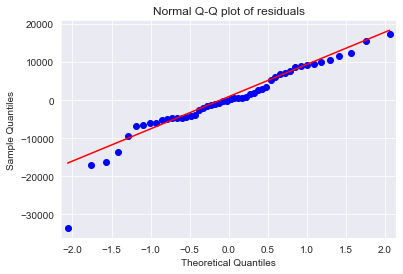

In [41]:
import statsmodels.api as sm

qqplot= sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [42]:
list(np.where(model.resid<-30000))

[array([49])]

### Residual Plot for homoscedasticity

In [43]:
def get_standardized_values(vals):
    return (vals- vals.mean())/vals.std()

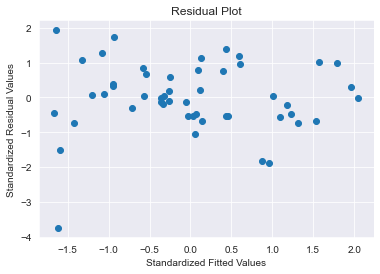

In [44]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Residual vs Regressors

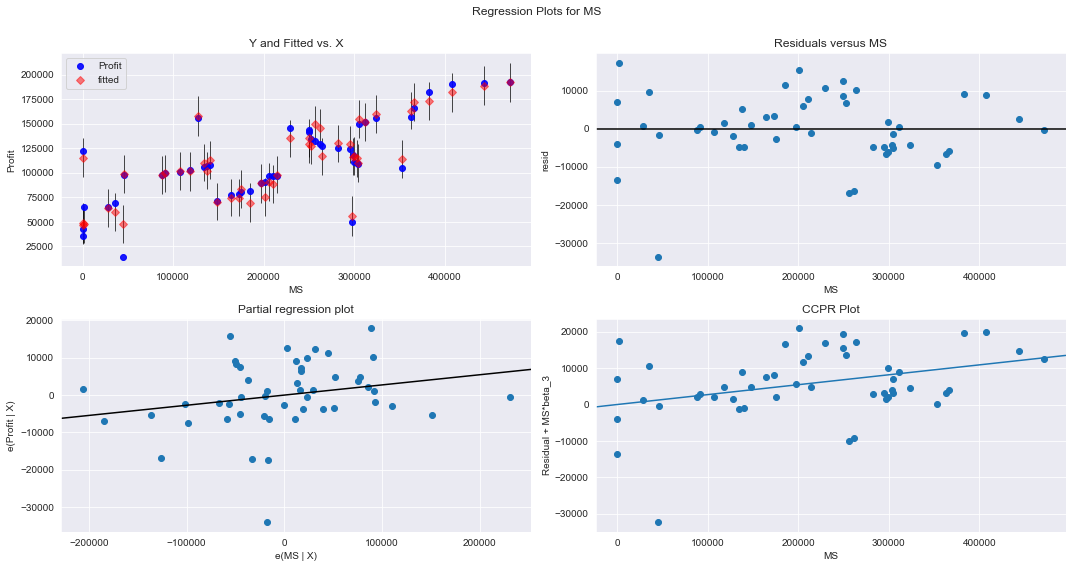

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig=fig)
plt.show()

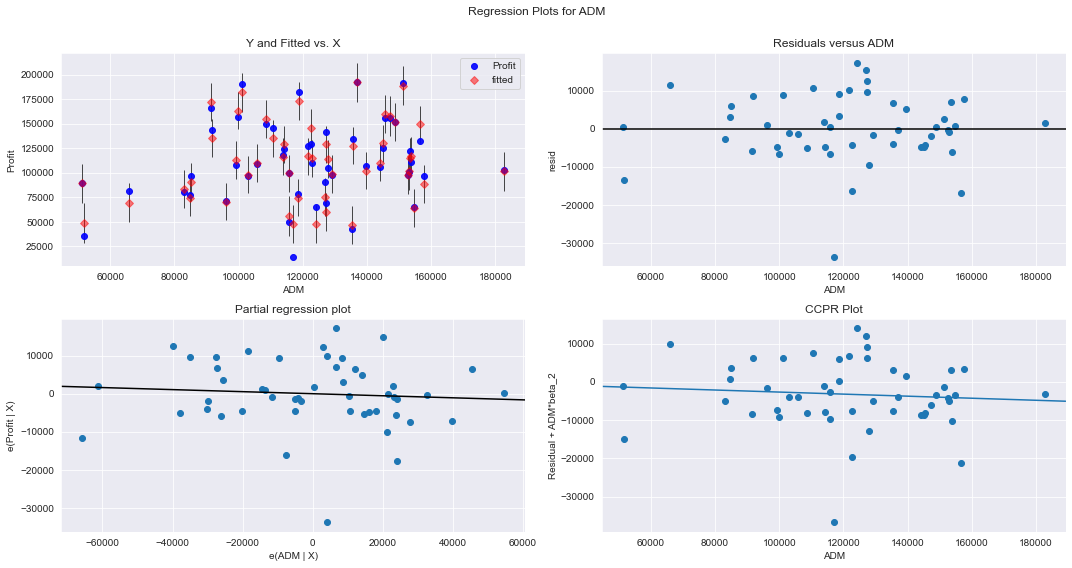

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'ADM', fig=fig)
plt.show()

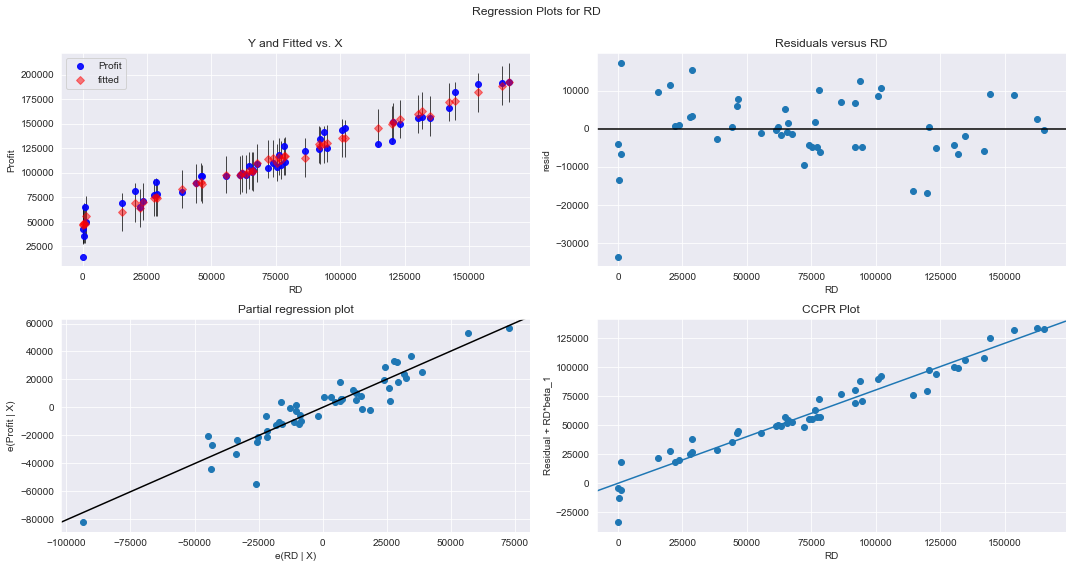

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'RD', fig=fig)
plt.show()

### Detecting Influencers/Outliers

In [53]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

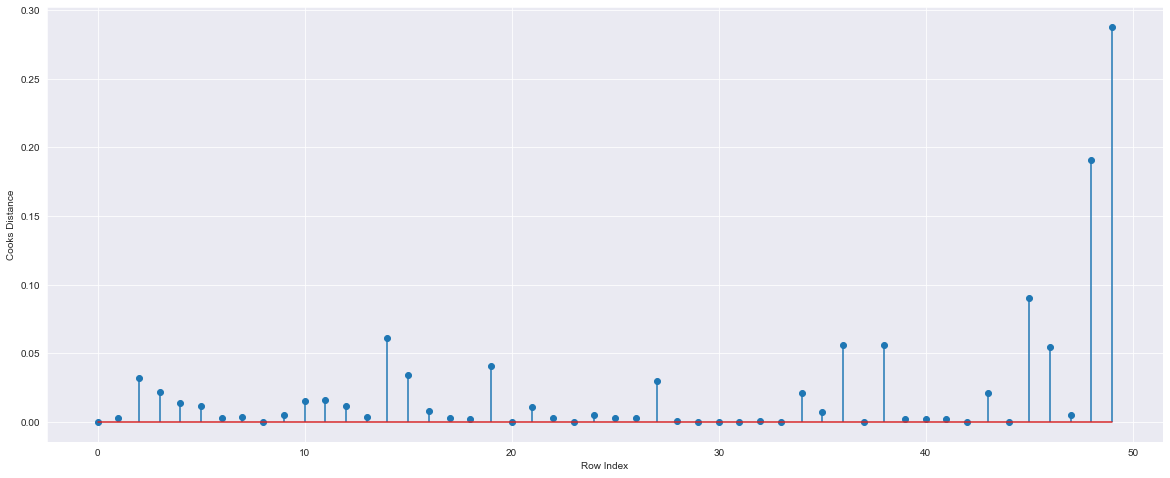

In [55]:
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(stdt1)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
np.argmax(c), np.max(c)

(49, 0.28808229275432584)

### High Influence Points

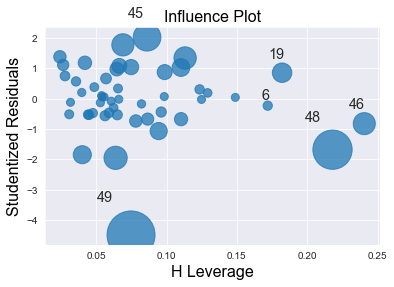

In [57]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [58]:
stdt1.shape

(50, 5)

In [59]:
k = stdt1.shape[1]
n = stdt1.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

### From above, we cannot find any major influencers basis the cut-off but cooks-decision shows one point which we must remove to get a better model

In [64]:
stdt1[stdt1.index.isin([49])]

,RD,ADM,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [65]:
stdt1.head()

,RD,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [86]:
stdt_new = stdt
stdt_new.tail()

,RD,ADM,MS,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [87]:
stdt2 = stdt_new.drop(stdt_new.index[[49]], axis=0).reset_index()
stdt2

,index,RD,ADM,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [88]:
stdt2 = stdt2.drop(['index'], axis=1)

In [90]:
stdt2.head()

,RD,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [92]:
final_stdt2 = smf.ols('Profit~RD+ADM+MS', data=stdt2).fit()

In [93]:
final_stdt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           8.85e-32
Time:                        18:16:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
(final_stdt2.rsquared, final_stdt2.aic )
# An improvement in rsquared and AIC can be observed making it the right trained model and we can now check cooks decision value again to find any influencer points

(0.9613162435129847, 1020.5652974526367)

In [99]:
model_influence_stdt2 = final_stdt2.get_influence()
(c_stdt2, _) = model_influence_stdt2.cooks_distance

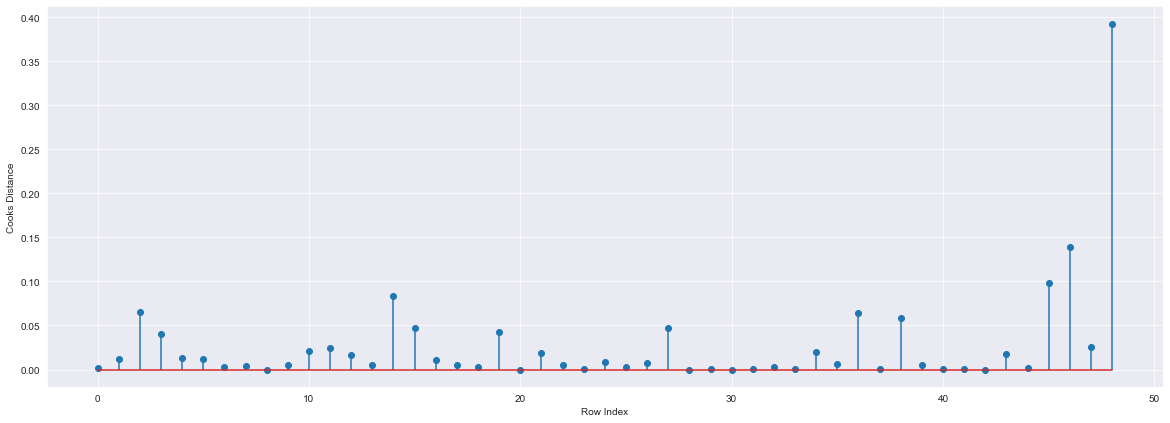

In [101]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(stdt2)), np.round(c_stdt2, 3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [102]:
np.argmax(c_stdt2), np.max(stdt2)

(48,
 RD         165349.2
 ADM       182645.56
 MS         471784.1
 State      New York
 Profit    192261.83
 dtype: object)

In [103]:
final_stdt2 =smf.ols('Profit~RD+ADM+MS', data = stdt2).fit()
final_stdt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           8.85e-32
Time:                        22:21:01   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
stdt2.head()

,RD,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [105]:
new_stdt = pd.DataFrame({'RD': 150000, 'ADM':120000, 'MS': 350000 }, index=[1])
new_stdt

,RD,ADM,MS
1,150000,120000,350000


In [106]:
final_stdt2.predict(stdt2.iloc[0: 4,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
dtype: float64

In [107]:
stdt2.head()

,RD,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [108]:
pred_profit=final_stdt2.predict(stdt2)

In [109]:
pred_profit

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Problem 2: Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt


In [126]:
ls

50_Startups.csv
AI [Regression ] (1).ipynb
AI [Regression ].ipynb
Anova and Chisquare.ipynb
Assignment 4- Linear Regression.ipynb
Assignment 5- ML Regression.ipynb
BEML.csv
Cars-2.csv
Chapter 2_ Sampling Distributions and Confidence Intervals – Natural Resources Biometrics.pdf
Chapter 3_ Hypothesis Testing – Natural Resources Biometrics.pdf
Class Data/
Class_python_morning.ipynb
Confidence Interval.ipynb
Datatypes_1.ipynb
Day 7,8,9&10/
Decorators.ipynb
GLAXO.csv
Hyp_Classwork.ipynb
Hypothesis Test.ipynb
Logistic Regression.ipynb
ML Regression - Predicting Mileage using Features.ipynb
Machine Learning A-Z (Codes and Datasets)/
Multi Linear Regression.ipynb
Neha Gupta-Evening Class.ipynb
NewspaperData.csv
Normal Disribution.ipynb
Pandas Practice.ipynb
Pandas_Introduction.ipynb
Practice AI Linear Regression.ipynb
Practice Details.ipynb
Practice Graphs- pandas and matplots.ipynb
Python Class-Geethika.ipynb
Simple Linear Reg- asgnmt 4/
ToyotaCor.csv
ToyotaCorolla.csv
Untitled1.ipynb
Untitle